In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# !pip install scikit-learn
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from pylab import rcParams
rcParams['figure.figsize']=10,8
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter('ignore')

# Linear Regression

In [3]:
df=pd.read_csv('student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
X=df[['Hours']]
y = df[['Scores']]
y[1:10]



,Scores
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


<function matplotlib.pyplot.show(close=None, block=None)>

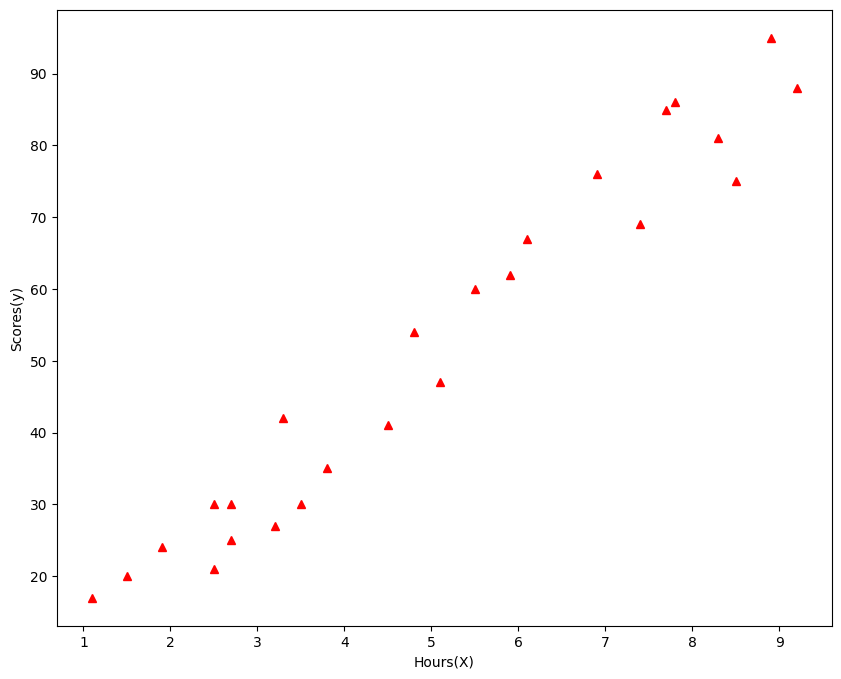

In [8]:
plt.plot(X,y,'r^')
plt.xlabel('Hours(X)')
plt.ylabel('Scores(y)')
plt.show

In [9]:
model_lreg=LinearRegression()
model_lreg.fit(X,y)


LinearRegression()

In [10]:
print(f'alfa:{model_lreg.intercept_} \nbeta: {model_lreg.coef_}')

alfa:[2.48367341] 
beta: [[9.77580339]]


In [11]:
model_lreg.score(X,y)

0.9529481969048356

In [14]:
X_new= np.random.randint(10,20,(100,1))
X_new[1:10]

array([[14],
       [14],
       [16],
       [12],
       [14],
       [14],
       [11],
       [12],
       [11]])

In [33]:
y_new=model_lreg.predict(X_new)
y_pre=model_lreg.predict(X)
y_new[1:10]

array([[139.34492088],
       [139.34492088],
       [158.89652766],
       [119.79331409],
       [139.34492088],
       [139.34492088],
       [110.0175107 ],
       [119.79331409],
       [110.0175107 ]])

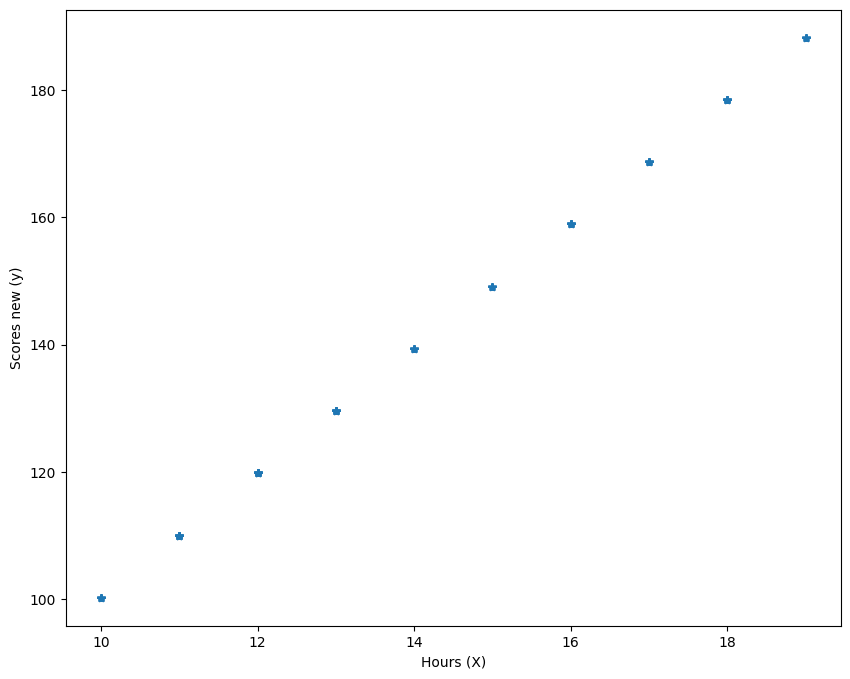

In [36]:
plt.plot(X_new,y_new,'*')
plt.xlabel('Hours (X)')
plt.ylabel('Scores new (y)')
plt.show()

In [37]:
model_lreg.score(X_new,y_new)

1.0

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [38]:
mae=mean_absolute_error(y, y_pre)
mse=mean_squared_error(y, y_pre)
rmse= np.sqrt(mse)


In [39]:
print(f'MAE = {mae}')
print(f'MSE = {mse}')
print(f'RMSE = {rmse}')

MAE = 4.972805319866375
MSE = 28.882730509245466
RMSE = 5.374265578592619


# Multiple regression

In [40]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

In [41]:
df= 'petrol_consumption.csv'
enrol= pd.read_csv(df)
enrol.head(10)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


In [44]:
enrol.columns = ['вартість','заробіток','асфальт','ліцензії','споживання']


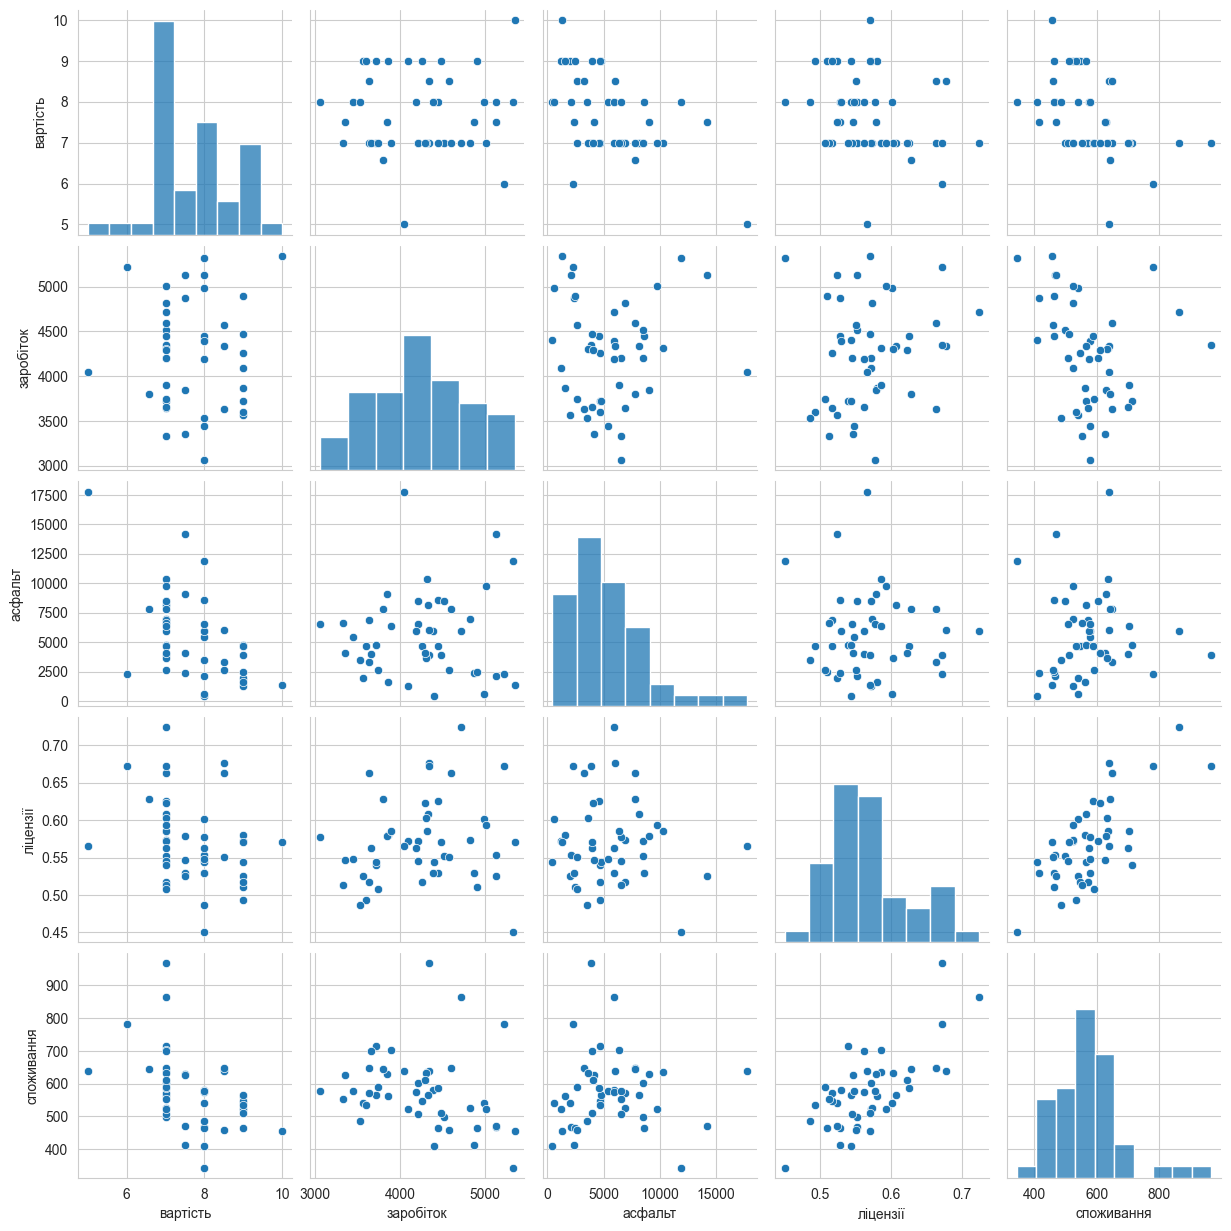

In [45]:
sb.pairplot(enrol)

In [47]:
corell= enrol.corr()
corell

,вартість,заробіток,асфальт,ліцензії,споживання
вартість,1.000000,0.012665,-0.522130,-0.288037,-0.451280
заробіток,0.012665,1.000000,0.050163,0.157070,-0.244862
асфальт,-0.522130,0.050163,1.000000,-0.064129,0.019042
ліцензії,-0.288037,0.157070,-0.064129,1.000000,0.698965
споживання,-0.451280,-0.244862,0.019042,0.698965,1.000000


<Axes: >

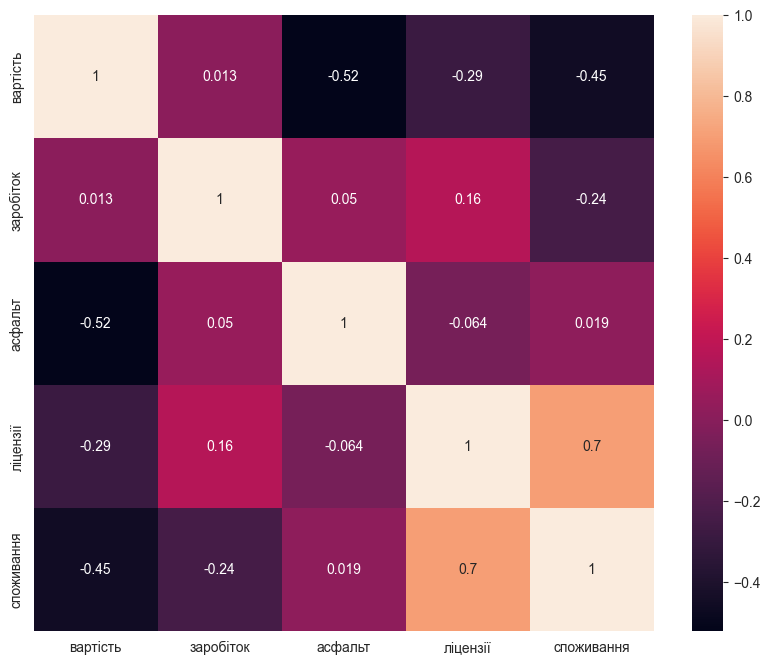

In [48]:
sb.heatmap(corell, annot=True)

ВИБРАКОВУЄМО ПОКАЗНИК АСФАЛЬТ тому що він має дуже великий зворотній кореляційний зв'язок з вартістю палива та
НЕ ВИБРАКОВУЄМО ВАРТІСТЬ тому що вона моє досить великий зв'язок з шукомим показником споживання

In [93]:

enrol_data = enrol[['вартість','заробіток','ліцензії']].values
enrol_target = enrol[['споживання']].values
enrol_data_names=['вартість','заробіток','ліцензії']

X, y = scale(enrol_data), enrol_target

In [94]:
missing= X==np.NAN
X[missing==True]

array([], dtype=float64)

In [95]:
model_mlg = LinearRegression()

In [96]:
model_mlg.fit(X,y)

LinearRegression()

In [97]:
model_mlg.score(X,y)

0.6748583388195666

In [98]:
print(f'beta0:{model_mlg.intercept_} \nbeta: {model_mlg.coef_}')

beta0:[576.77083333] 
beta: [[-27.73877318 -38.61093741  75.46022562]]


In [99]:
y_pred = model_mlg.predict(X)
print(f'prediction {y_pred}')

prediction [[520.81739659]
 [549.99160104]
 [576.4309379 ]
 [482.18048592]
 [520.09887559]
 [434.10444711]
 [329.66438073]
 [483.01917094]
 [496.21225207]
 [552.89424809]
 [501.39630073]
 [459.26755971]
 [562.39218036]
 [564.01784199]
 [642.12539419]
 [612.83280921]
 [601.20461195]
 [590.40717924]
 [775.47775104]
 [692.14649595]
 [699.98368993]
 [560.11009228]
 [411.37232441]
 [463.08754341]
 [503.07634941]
 [536.73456716]
 [590.28769058]
 [620.5743167 ]
 [560.57229919]
 [474.78412159]
 [565.46805739]
 [579.47723384]
 [657.71954461]
 [609.84490685]
 [500.98498858]
 [719.43084705]
 [662.87529932]
 [641.47043393]
 [720.92387846]
 [729.2262753 ]
 [658.91255079]
 [626.24427011]
 [637.42828371]
 [544.57797282]
 [699.53019431]
 [522.49605379]
 [665.19574337]
 [575.92855078]]


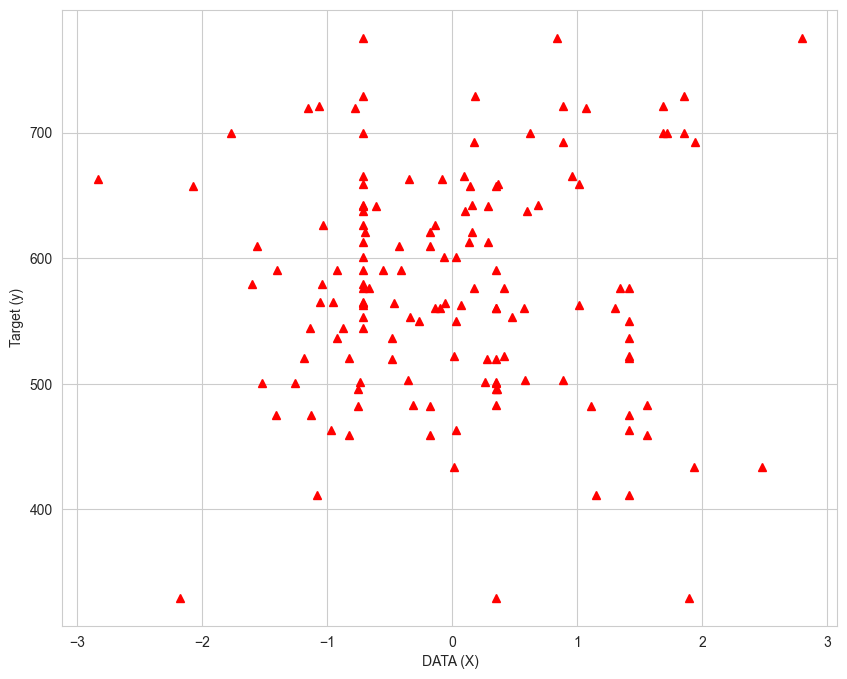

In [100]:
plt.plot(X,y_pred,'r^')
plt.xlabel('DATA (X)')
plt.ylabel('Target (y)')
plt.show()

In [102]:
model_mlg.score(X, y_pred)

1.0

In [108]:
mae=mean_absolute_error(y, y_pred)
mse=mean_squared_error(y, y_pred)
rmse= np.sqrt(mse)

In [109]:
print(f'MAE = {mae}')
print(f'MSE = {mse}')
print(f'RMSE = {rmse}')

MAE = 48.34751168883821
MSE = 3985.4678003986023
RMSE = 63.13056154033958
